# Heart disease is the number 1 global leading cause of death 
# This model is used to classify whether or not someone has a heart disease/condition based on the data provided

In [53]:
import pandas as pd
import numpy as np
import sklearn as sl
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Load and explore dataset

In [21]:
df = pd.read_csv("heart.xls")
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


# Count of poeple that have been diagnosed with heart disease
### we do this to make sure our dataset is not imbalanced and results in a accuracy paradox

In [12]:
df['target'].value_counts()

1    629
0    561
Name: target, dtype: int64

# Lets visualize this 

/Users/isiahm/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

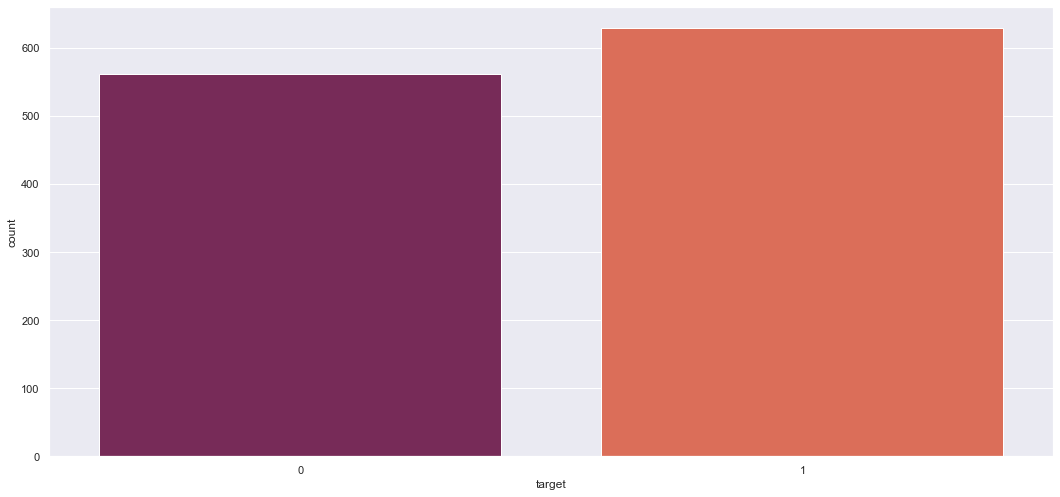

In [33]:
sns.countplot(df["target"], palette='rocket')

# From this we can see the count of who was and who not diagnosed, but now lets take a deeper look
### lets see this same count compared to the age of each person

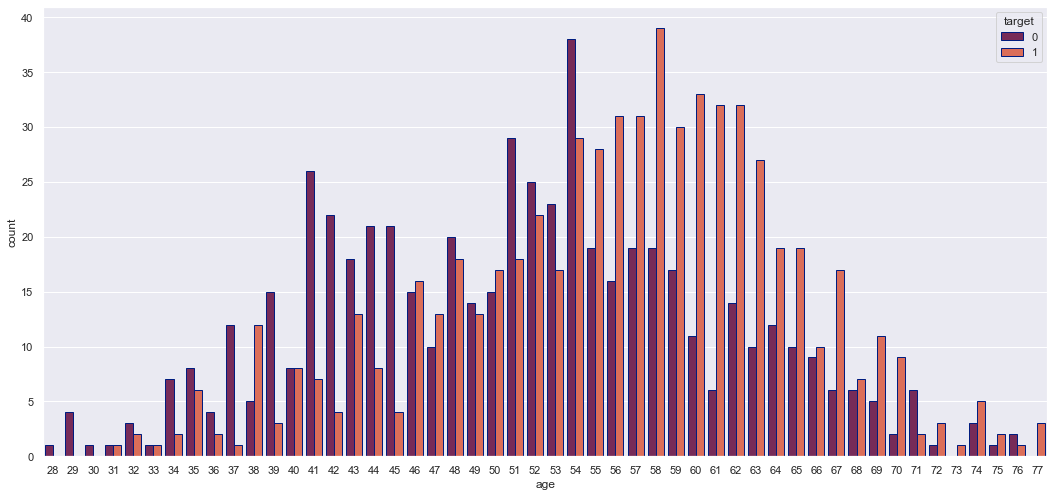

In [35]:
sns.countplot(x='age', hue='target', data=df, palette='rocket', edgecolor=sns.color_palette('dark', n_colors=1))
sns.set(rc={'figure.figsize':(18,8.27)})

# correlation of the dataset

In [36]:
df.corr()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,0.015096,0.149055,0.257692,-0.046472,0.178923,0.194595,-0.368676,0.188095,0.245093,0.237749,0.262029
sex,0.015096,1.000000,0.138405,-0.006443,-0.208441,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.127913,0.311267
chest pain type,0.149055,0.138405,1.000000,0.009466,-0.109396,0.076492,0.035705,-0.337491,0.403428,0.224106,0.276949,0.460127
resting bp s,0.257692,-0.006443,0.009466,1.000000,0.099037,0.088235,0.095860,-0.101357,0.142435,0.176111,0.089384,0.121415
cholesterol,-0.046472,-0.208441,-0.109396,0.099037,1.000000,-0.239778,0.150879,0.238028,-0.033261,0.057451,-0.100053,-0.198366
fasting blood sugar,0.178923,0.110961,0.076492,0.088235,-0.239778,1.000000,0.032124,-0.118689,0.053053,0.031193,0.145902,0.216695
resting ecg,0.194595,-0.022225,0.035705,0.095860,0.150879,0.032124,1.000000,0.058812,0.037821,0.126023,0.093629,0.073059
max heart rate,-0.368676,-0.181837,-0.337491,-0.101357,0.238028,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.350750,-0.413278
exercise angina,0.188095,0.194380,0.403428,0.142435,-0.033261,0.053053,0.037821,-0.377691,1.000000,0.370772,0.393408,0.481467
oldpeak,0.245093,0.096390,0.224106,0.176111,0.057451,0.031193,0.126023,-0.183688,0.370772,1.000000,0.524639,0.398385


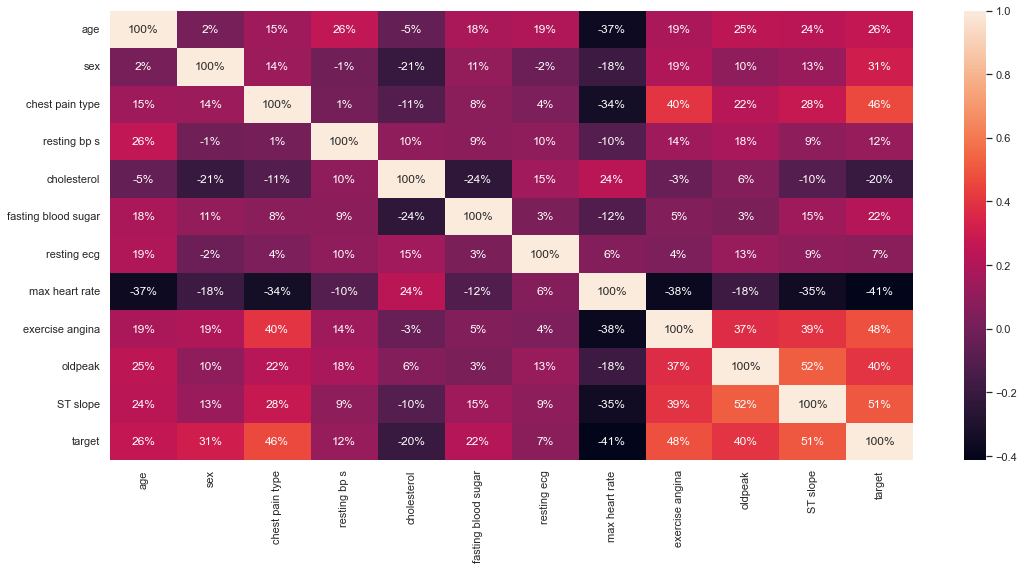

In [40]:
sns.heatmap(df.corr(), annot=True, fmt='.0%')
sns.set(rc={'figure.figsize':(18,8.27)})

# split data for the ML model 

In [42]:
# split data into features and target

# all columns except for last 
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [44]:
# now split into 75% training and 25% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [50]:
# feature scale to be values between 0 and 1 inclusive

sc = StandardScaler()
#fit and transform
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# use a random forest classifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
#now train model
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

# Test the model accuracy with training data

In [51]:
model = forest
# get score of accuracy
model.score(X_train, Y_train)

0.9943946188340808

# test the model accuracy with testing data

In [57]:
cm = confusion_matrix(Y_test, model.predict(X_test))
# true negative
TN = cm[0][0]
# true positve
TP = cm[1][1]
# false negative
FN = cm[1][0]
# false positive
FP = cm[0][1]


print(cm)
# SHOW model test accuracy
print('Model test accuracy = {}'. format( (TP + TN)/( TP + TN + FN + FP)))

[[134   9]
 [ 16 139]]
Model test accuracy = 0.9161073825503355


# As a result the accuracy of our model is 91% this is good but unfortunatly its not 100% percent although it can be difficult to reach in the health care industry it is imperative for models to be as accurate as possible so as to diagnose patients properly